# PCA를 이용해서 diabates 적용해보기

C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


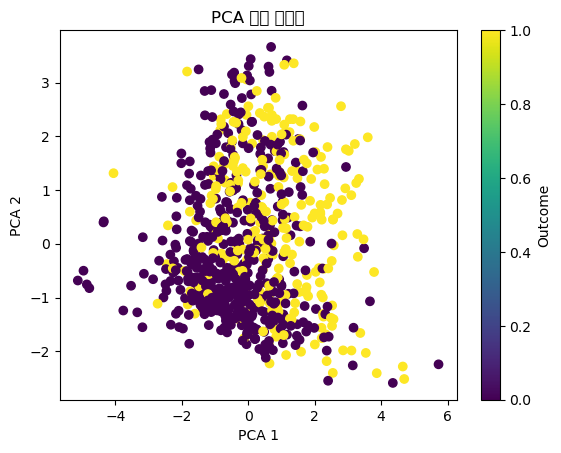

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 로드
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv'
data = pd.read_csv(url)

# X는 'Outcome'을 제외한 나머지 특성
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (n_components는 자유롭게 설정)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 결과 시각화')
plt.colorbar(label='Outcome')
plt.show()


In [3]:
import pandas as pd

# 데이터 로드
data = pd.read_csv("C:/Users/tksmd/DSA_features.csv")

# 열 이름 확인
print(data.columns)

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# 1. 데이터 로드
data = pd.read_csv("C:/Users/tksmd/DSA_features.csv")

# lying과 jumping 데이터 선택
lying_data = data[data['activity'].isin(['lyingRigh', 'lyingBack'])]
jumping_data = data[data['activity'] == 'jumping']

# 피처와 레이블 분리 (people 같은 문자열 열을 제거)
X_lying = lying_data.drop(['activity', 'people'], axis=1).values
X_jumping = jumping_data.drop(['activity', 'people'], axis=1).values

# 2. Autoencoder 학습 데이터 준비
X_train, X_test = train_test_split(X_lying, test_size=0.2, random_state=2024)

# 데이터 타입을 float으로 변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 3. Autoencoder 모델 구축
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')  # 입력 차원과 동일
])

autoencoder.compile(optimizer='adam', loss='mse')

# 4. Autoencoder 학습
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# 5. 재구성 오류 계산
combined_data = np.vstack((X_lying, X_jumping))
combined_data = combined_data.astype('float32')  # 데이터 타입 변환
reconstructions = autoencoder.predict(combined_data)
reconstruction_errors = np.mean(np.abs(reconstructions - combined_data), axis=1)

# 6. Threshold 설정 및 분류
threshold = np.percentile(reconstruction_errors, 95)  # 상위 95% 기준 설정
predicted_labels = reconstruction_errors > threshold

# 7. accuracy 계산
true_labels = np.hstack([np.zeros(len(X_lying)), np.ones(len(X_jumping))])  # 정상은 0, 비정상은 1
accuracy = np.mean(predicted_labels == true_labels)

print(f"Accuracy: {accuracy:.4f}")


Epoch 1/50


C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.5798 - val_loss: 5.3917
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0794 - val_loss: 5.1093
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9143 - val_loss: 5.0587
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8776 - val_loss: 5.0393
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8296 - val_loss: 5.0280
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8161 - val_loss: 5.0207
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7841 - val_loss: 5.0155
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7861 - val_loss: 5.0122
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7962 - val_loss: 5.0084
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7873 - val_loss: 5.0070
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8017 - val_loss: 5.0054
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7927 - val_loss: 5.0033